In [17]:
import MDAnalysis
import matplotlib.pyplot as plt
import MDAnalysis.analysis.rms

plt.figure(figsize=(20,10))
def plot(R,c):
    rmsd = R.rmsd.T   # transpose makes it easier for plotting
    time = [x/1000 for x in rmsd[1]]
    plt.plot(time, rmsd[2], label=labels[c])

filenames = ['../4HFI_WT_pH46/4HFI_WT_pH46_md1_onlyprotein_fit-to-4HFI.xtc','../4HFI_WT_pH70/4trjconv/4HFI_WT_pH70_md1_onlyprotein_fit-to-4HFI.xtc','../4HFI_I9T_pH7/4trjconv/4HFI_I9T_pH7_md1_onlyprotein_fit-to-4HFI.xtc','../4NPQ_WT_pH46/4trjconv/4NPQ_WT_pH46_md1_onlyprotein_fit-to-4NPQ.xtc','../4NPQ_BA2_pH46/4trjconv/4NPQ_BA2_pH46_md1_onlyprotein_fit-to-4NPQ.xtc','../4NPQ_WT_pH70/4trjconv/4NPQ_WT_pH70_md1_onlyprotein_fit-to-4NPQ.xtc','../4NPQ_I9T_pH46/4trjconv/4NPQ_I9T_pH46_md1_onlyprotein_fit-to-4NPQ.xtc','../4NPQ_F238L_pH46/4trjconv/4NPQ_F238L_pH46_md1_onlyprotein_fit-to-4NPQ.xtc','../4NPQ_233_238_mut_pH46/4trjconv/4NPQ_233_238_mut_pH46_md1_onlyprotein_fit-to-4NPQ.xtc']
labels = ['O-O','O-C WT','O-C I9T','C-O WT','C-O BA2','C-C','C-O I9T','C-O F14L','C-O I9T/F14L']
ref_4NPQ = MDAnalysis.Universe('../4NPQ_WT_pH70/4trjconv/4NPQ_WT_pH70_noMNMC.pdb')
ref_4HFI = MDAnalysis.Universe('../4HFI_WT_pH70/4trjconv/4HFI_WT_pH70_noMNMC.pdb')

c = 0
for f in filenames:
    if '4HFI' in f:
        ref = ref_4HFI
    else:
        ref = ref_4NPQ
    u = MDAnalysis.Universe(f[0:-31]+'noMNMC.pdb', f)
    R = MDAnalysis.analysis.rms.RMSD(u, reference=ref, select='backbone')            
    R.run()
    plot(R,c)
    c += 1

RMSD  1.89 A at frame   553/553  [100.0%]
RMSD  2.54 A at frame  1001/1001  [100.0%]
RMSD  3.07 A at frame   924/924  [100.0%]
RMSD  2.53 A at frame   581/581  [100.0%]
RMSD  2.46 A at frame  1006/1006  [100.0%]
RMSD  2.62 A at frame   509/509  [100.0%]
RMSD  2.87 A at frame  1595/1595  [100.0%]
RMSD  2.61 A at frame  1470/1470  [100.0%]
RMSD  2.93 A at frame  1024/1024  [100.0%]


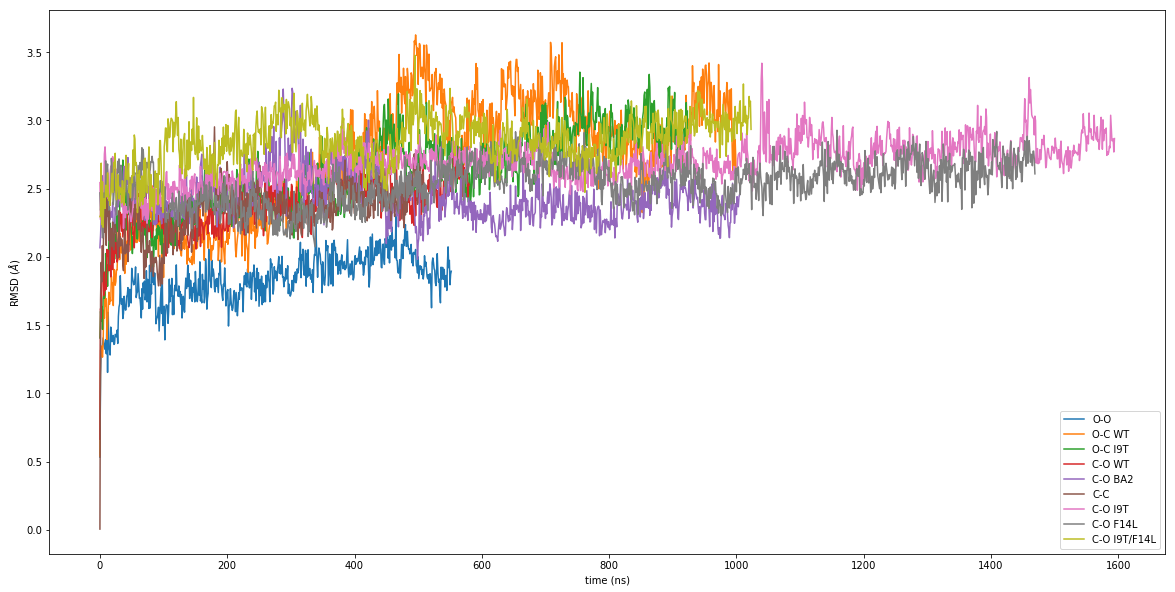

In [18]:
plt.legend(loc="best")
plt.xlabel("time (ns)")
plt.ylabel(r"RMSD ($\AA$)")
plt.show()